In [23]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
import pylab as P
from sklearn.cluster import KMeans

In [2]:
us=pd.read_csv('universities_pca_2 .csv')

In [3]:
us.shape

(471, 18)

In [4]:
us.head()#special data does not exist(eg. containing much 0)

,College Name,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,193,146,55,16,44,249,869,7560,7560,1620,2500,130,800,1500,76,11.9,15
1,University of Alaska Southeast,146,117,89,4,24,492,1849,1742,5226,2514,2250,34,500,1162,39,9.5,39
2,Birmingham-Southern College,805,588,287,67,88,1376,207,11660,11660,2050,2430,120,400,900,74,14.0,72
3,Huntingdon College,608,520,127,26,47,538,126,8080,8080,1380,2540,100,500,1100,63,11.4,44
4,Talladega College,4414,1500,335,30,60,908,119,5666,5666,1424,1540,418,1000,1400,56,15.5,46


In [5]:
us.dtypes #To scale the features

College Name                 object
# appli. rec'd                int64
# appl. accepted              int64
# new stud. enrolled          int64
% new stud. from top 10%      int64
% new stud. from top 25%      int64
# FT undergrad                int64
# PT undergrad                int64
in-state tuition              int64
out-of-state tuition          int64
room                          int64
board                         int64
add. fees                     int64
estim. book costs             int64
estim. personal $             int64
% fac. w/PHD                  int64
stud./fac. ratio            float64
Graduation rate               int64
dtype: object

In [6]:
us[us.isnull().values==True]# we don't have null number, congratulations!

,College Name,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate


In [7]:
us_new=us.drop(['College Name'],axis=1)

In [8]:
us_new

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,193,146,55,16,44,249,869,7560,7560,1620,2500,130,800,1500,76,11.9,15
1,146,117,89,4,24,492,1849,1742,5226,2514,2250,34,500,1162,39,9.5,39
2,805,588,287,67,88,1376,207,11660,11660,2050,2430,120,400,900,74,14.0,72
3,608,520,127,26,47,538,126,8080,8080,1380,2540,100,500,1100,63,11.4,44
4,4414,1500,335,30,60,908,119,5666,5666,1424,1540,418,1000,1400,56,15.5,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,5729,4520,1957,20,52,8516,1264,2208,6996,1565,1140,1070,279,1260,80,19.3,61
467,152,128,75,17,41,282,22,9100,9100,1800,1900,90,500,1400,48,8.5,50
468,582,498,172,21,44,799,78,10468,10468,1574,1806,92,660,1800,40,11.5,52
469,4226,3666,2007,14,60,7703,2339,1660,5094,2030,1980,330,700,1560,77,16.6,50


In [9]:
for column in us_new.columns:
    us_new[column] = us_new[column].apply(lambda x: (x - min(us[column])) / (max(us[column]) - min(us[column])))

In [10]:
us_new.head(5)

,# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,0.002416,0.003236,0.004399,0.157895,0.384615,0.000000,0.039753,0.356659,0.341940,0.234674,0.491022,0.037071,0.315556,0.190840,0.715789,0.347490,0.000000
1,0.001437,0.002132,0.009741,0.031579,0.164835,0.007740,0.084635,0.058178,0.219458,0.448755,0.428678,0.007414,0.182222,0.139237,0.326316,0.254826,0.233010
2,0.015161,0.020062,0.040848,0.694737,0.868132,0.035899,0.009434,0.567002,0.557095,0.337644,0.473566,0.033982,0.137778,0.099237,0.694737,0.428571,0.553398
3,0.011059,0.017473,0.015711,0.263158,0.417582,0.009206,0.005725,0.383337,0.369228,0.177203,0.500998,0.027804,0.182222,0.129771,0.578947,0.328185,0.281553
4,0.090322,0.054779,0.048390,0.305263,0.560440,0.020991,0.005404,0.259491,0.242548,0.187739,0.251621,0.126043,0.404444,0.175573,0.505263,0.486486,0.300971


In [11]:
us_new.shape

(471, 17)

In [12]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=16)
pca.fit(us_new)

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

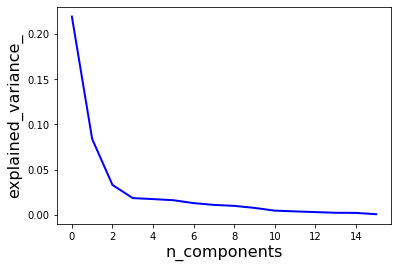

In [13]:
plt.figure()
plt.plot(pca.explained_variance_, 'b', linewidth=2)
plt.xlabel('n_components', fontsize=16)
plt.ylabel('explained_variance_', fontsize=16)
plt.show()

In [14]:
print(pca.explained_variance_ratio_)

[0.49266115 0.18837932 0.07412351 0.04133334 0.03885771 0.03608323
 0.02888189 0.02443215 0.02203495 0.01696808 0.01013027 0.00830545
 0.00655087 0.00487488 0.00452445 0.00128043]


#### As we can see,  if we want 95% explained variance, components=10 is enough, for 99% explained variance, components=14 will be ok, so I choose components=10.

In [15]:
pca = decomposition.PCA(n_components=4)
pca.fit(us_new)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
print(pca.explained_variance_ratio_)

[0.49266115 0.18837932 0.07412351 0.04133334]


In [17]:
print(abs( pca.components_ ))

[[2.12458894e-02 1.82320108e-04 3.52555156e-02 3.29612790e-01
  3.63144529e-01 5.14212642e-02 3.78408526e-02 5.51181922e-01
  4.56649985e-01 2.12567886e-01 1.90176150e-01 1.89512238e-02
  1.59259366e-02 6.93838812e-02 2.01136257e-01 2.02581710e-01
  2.70381520e-01]
 [2.38662727e-01 2.69149920e-01 4.44014340e-01 2.50134827e-01
  3.40325837e-01 4.60228602e-01 1.18617553e-01 3.32055387e-01
  9.53704823e-02 3.28442403e-02 1.14929908e-02 1.33064112e-01
  2.24771090e-02 1.02083228e-01 3.20776666e-01 1.05904732e-01
  7.65976804e-02]
 [1.40977869e-01 2.07544378e-01 2.17412323e-01 4.03934016e-01
  4.98312770e-01 2.19798978e-01 1.22243957e-01 1.50361797e-01
  2.24233917e-01 5.03307747e-01 2.73598383e-01 9.27075883e-02
  3.15057303e-02 1.13550436e-02 4.32107066e-02 2.07052661e-02
  4.44136371e-02]
 [3.75127166e-02 2.88580372e-02 1.00361337e-01 1.86782968e-01
  8.90106439e-02 1.32433315e-01 1.09868534e-01 8.32945515e-02
  4.00748470e-02 5.07807475e-02 5.11619872e-03 1.86821381e-01
  9.37549024e-02

In [18]:
explained_varience = ['component1','component2','component3','component4']
feature_1=feature_2=feature_3=feature_4=feature_5=feature_6=feature_7=feature_8=feature_9=feature_10=feature_11=feature_12=feature_13=feature_14=feature_15=feature_16=feature_17=np.array([])
for i in abs( pca.components_ ):
    feature_1=np.append(feature_1,np.array(i[0]))
    feature_2=np.append(feature_2,np.array(i[1]))
    feature_3=np.append(feature_3,np.array(i[2]))
    feature_4=np.append(feature_4,np.array(i[3]))
    feature_5=np.append(feature_5,np.array(i[4]))
    feature_6=np.append(feature_6,np.array(i[5]))
    feature_7=np.append(feature_7,np.array(i[6]))
    feature_8=np.append(feature_8,np.array(i[7]))
    feature_9=np.append(feature_9,np.array(i[8]))
    feature_10=np.append(feature_10,np.array(i[9]))
    feature_11=np.append(feature_11,np.array(i[10]))
    feature_12=np.append(feature_12,np.array(i[11]))
    feature_13=np.append(feature_13,np.array(i[12]))
    feature_14=np.append(feature_14,np.array(i[13]))
    feature_15=np.append(feature_15,np.array(i[14]))
    feature_16=np.append(feature_16,np.array(i[15]))
    feature_17=np.append(feature_17,np.array(i[16]))

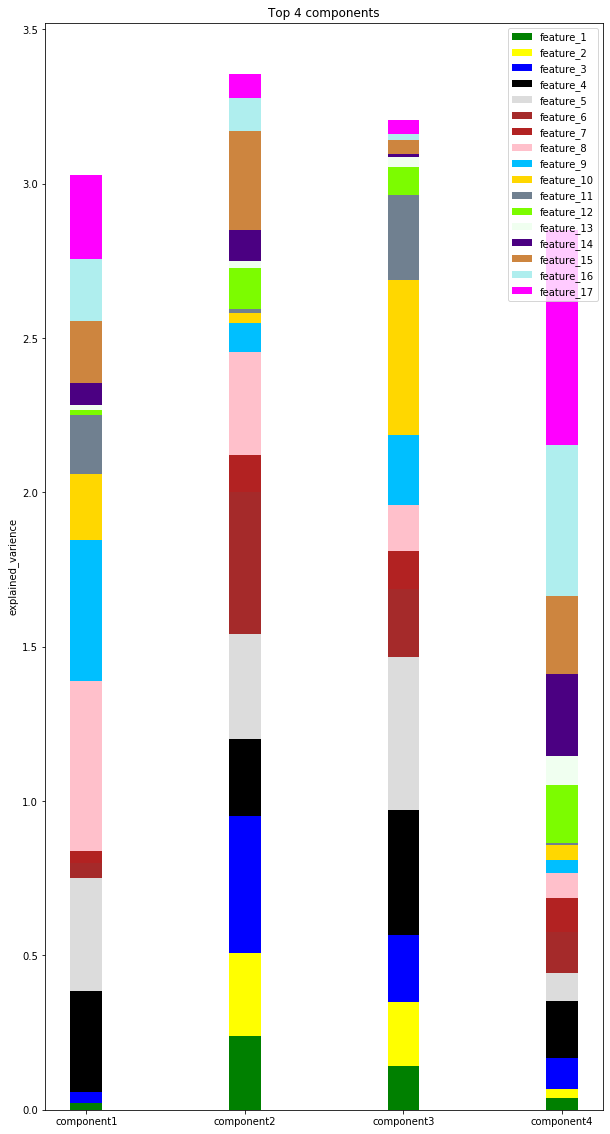

In [19]:
plt.figure(figsize=(10,20))
plt.bar(explained_varience,feature_1,width=0.2, label='feature_1', color="green")

plt.bar(explained_varience,feature_2,width=0.2, label='feature_2',bottom=feature_1, color="yellow")

plt.bar(explained_varience,feature_3,width=0.2,label='feature_3', bottom=feature_1+feature_2, color="blue")

plt.bar(explained_varience,feature_4,width=0.2,label='feature_4', bottom=feature_1+feature_2+feature_3, color="black")
plt.bar(explained_varience,feature_5,width=0.2,label='feature_5', bottom=feature_1+feature_2+feature_3+feature_4, color="gainsboro")
plt.bar(explained_varience,feature_6,width=0.2,label='feature_6', bottom=feature_1+feature_2+feature_3+feature_4+feature_5, color="brown")
plt.bar(explained_varience,feature_7,width=0.2,label='feature_7', bottom=feature_1+feature_2+feature_3+feature_4+feature_5+feature_6, color="firebrick")
plt.bar(explained_varience,feature_8,width=0.2,label='feature_8', bottom=feature_1+feature_2+feature_3+feature_4+feature_5+feature_6+feature_7, color="pink")
plt.bar(explained_varience,feature_9,width=0.2,label='feature_9', bottom=feature_1+feature_2+feature_3+feature_4+feature_5+feature_6+feature_7+feature_8, color="deepskyblue")
plt.bar(explained_varience,feature_10,width=0.2,label='feature_10', bottom=feature_1+feature_2+feature_3+feature_4+feature_5+feature_6+feature_7+feature_8+feature_9, color="gold")
plt.bar(explained_varience,feature_11,width=0.2,label='feature_11', bottom=feature_1+feature_2+feature_3+feature_4+feature_5+feature_6+feature_7+feature_8+feature_9+feature_10, color="slategray")
plt.bar(explained_varience,feature_12,width=0.2,label='feature_12', bottom=feature_1+feature_2+feature_3+feature_4+feature_5+feature_6+feature_7+feature_8+feature_9+feature_10+feature_11, color="lawngreen")
plt.bar(explained_varience,feature_13,width=0.2,label='feature_13', bottom=feature_1+feature_2+feature_3+feature_4+feature_5+feature_6+feature_7+feature_8+feature_9+feature_10+feature_11+feature_12, color="honeydew")
plt.bar(explained_varience,feature_14,width=0.2,label='feature_14', bottom=feature_1+feature_2+feature_3+feature_4+feature_5+feature_6+feature_7+feature_8+feature_9+feature_10+feature_11+feature_12+feature_13, color="indigo")
plt.bar(explained_varience,feature_15,width=0.2,label='feature_15', bottom=feature_1+feature_2+feature_3+feature_4+feature_5+feature_6+feature_7+feature_8+feature_9+feature_10+feature_11+feature_12+feature_13+feature_14, color="peru")
plt.bar(explained_varience,feature_16,width=0.2,label='feature_16', bottom=feature_1+feature_2+feature_3+feature_4+feature_5+feature_6+feature_7+feature_8+feature_9+feature_10+feature_11+feature_12+feature_13+feature_14+feature_15,color="paleturquoise")
plt.bar(explained_varience,feature_17,width=0.2,label='feature_17', bottom=feature_1+feature_2+feature_3+feature_4+feature_5+feature_6+feature_7+feature_8+feature_9+feature_10+feature_11+feature_12+feature_13+feature_14+feature_15+feature_16,color="fuchsia")

plt.legend(loc="upper right")
plt.title("Top 4 components")

plt.ylabel('explained_varience')

plt.show()  

#### From the graph above we can see that the 4 new components are contributed by mainly all fetures in the dataset. And the component1 mainly reprensents the *"new stud. from top 25%","in state tuition" and "out state tuition"*; the component2 mainly reprensents the *new stud. enrolled, # PT undergrad*; the component3 mainly reprensents the % new stud. from top 10%,% new stud. from top 25% and room while the component4 mainly reprensents the* stud./fac. ratio and Graduation rate*

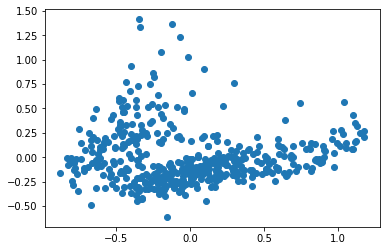

In [20]:
pca = decomposition.PCA(n_components=2)
pca.fit(us_new)
us_new_pca=pca.transform(us_new)
pca_x=[]
pca_y=[]
for i in us_new_pca:
    pca_x.append(i[0])
    pca_y.append(i[1])
plt.plot(pca_x,pca_y,'o')

#### From the graph above we can see that like 70% data is basically in the same line and of course there are some outliners. For example, there are some schools which have poor score in component 1 but have high score in component 2

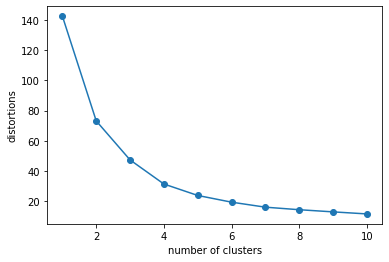

In [24]:
# kmeans.inertia method
d=[]
for i in range(1,11):    #Let's pick k from 1 to 11 to see which number of k will be the best
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(us_new_pca)
    d.append(km.inertia_)  

plt.plot(range(1,11),d,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortions')
plt.show()

In [25]:
from sklearn import metrics
from sklearn.cluster import SpectralClustering

#silhouette_score method

small=2
large=12
silScore=np.zeros([1,large-small+1])

for i in range(small,large):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    clustering_i=km.fit(us_new_pca)
    labels = clustering_i.labels_
    silScore[0,i-small]=metrics.silhouette_score(us_new_pca, labels, metric='euclidean')

##find the number of clusters when the score is the largest                                              
index=np.argmax(silScore)

n_clusters=index+small

print("the number of clusters: ", n_clusters)


the number of clusters:  4


It seems both 3 and 4 are good choices, so here let's just choose 4 and next we'll see what will happen if we use two components first.

In [54]:
kmeans=KMeans(n_clusters=4)
pca = decomposition.PCA(n_components=2)
pca.fit(us_new)
us_new_pca=pca.transform(us_new)
kmeans.fit(us_new_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

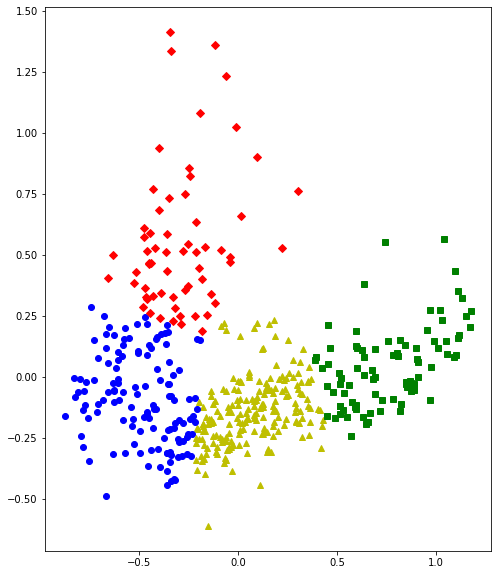

In [55]:
plt.figure(figsize=(8,10))  
colors = ['b', 'g', 'r','y']  
markers = ['o', 's', 'D','^']  
for i,l in enumerate(kmeans.labels_):  
     plt.plot(pca_x[i],pca_y[i],color=colors[l],marker=markers[l],ls='None')  
plt.show()  

In [28]:
print(kmeans.labels_)

[0 0 1 2 0 0 2 2 0 3 3 3 3 1 1 1 1 1 2 1 0 1 2 1 1 1 2 0 1 0 0 0 0 0 1 2 2
 1 2 2 1 0 3 2 1 1 2 3 2 0 2 0 2 1 2 1 3 0 1 2 2 3 2 2 3 2 2 2 2 2 0 0 1 2
 2 0 2 2 3 2 2 0 0 2 2 2 2 1 1 1 0 2 2 0 2 2 1 3 3 0 2 2 1 2 2 2 2 0 2 0 2
 2 2 2 2 2 0 2 0 0 0 0 2 1 2 2 0 2 2 0 3 2 1 1 2 2 1 2 1 1 2 1 2 1 0 0 0 0
 1 2 3 1 1 1 1 1 0 3 0 1 1 0 2 0 2 2 2 0 2 2 0 3 3 0 2 3 2 1 2 2 2 2 1 0 2
 2 2 3 0 0 2 2 0 0 0 0 3 2 1 0 2 2 2 2 0 3 0 3 0 0 3 0 0 1 1 3 0 0 0 2 2 0
 2 0 0 2 2 3 3 0 0 3 0 0 0 3 0 0 2 0 2 2 0 3 0 1 2 2 3 0 2 1 2 0 2 3 2 1 3
 2 2 3 3 3 2 0 1 2 2 1 1 1 1 2 2 1 2 2 2 2 2 0 2 1 1 2 2 2 1 3 3 0 0 0 0 3
 0 3 0 0 1 1 1 0 2 2 3 1 2 2 2 1 2 1 2 2 2 2 1 3 0 3 2 2 1 2 3 2 0 0 0 3 0
 0 2 2 2 1 2 2 1 1 1 2 2 1 2 2 2 2 1 2 2 1 2 1 0 2 2 2 0 3 0 2 2 2 1 3 2 1
 3 2 1 1 0 2 2 0 2 2 3 1 2 3 2 0 0 0 2 2 1 0 2 2 2 0 0 0 2 2 2 0 2 0 0 2 2
 1 0 0 3 1 1 0 0 0 2 0 3 0 2 0 0 2 0 0 1 2 2 3 3 0 3 3 2 2 3 2 2 0 2 2 2 3
 3 3 0 2 1 3 0 0 0 0 2 2 2 2 1 2 2 1 2 2 2 0 3 2 2 3 0]


#### As we already know how the orignal features contribute to the new components, now we can try to describe the clusters. To be specific, cluster1 has low score in both component1 and component2 , which means it has low *new stud. from top 25% , tuition fee and new stud. enrolled* while cluster 2 has high score in component1 but low score in component2, so basically it means those schools have high tuition so there are few students want to enroll. And so on, the cluster 3 represents school that has medium new stud.from top 25% and tuition fee , the cluster 4 represents school that has low tuition fee but  high stud. enrolled and I guess this is because they are public school with low tuition but they have good education equality so they attracted many students, eg: University of Florida.

Finally let's try to repeat step3 and find more interesting conclusions. For example, let's try to use three components.

In [32]:
kmeans=KMeans(n_clusters=4)
pca = decomposition.PCA(n_components=3)
pca.fit(us_new)
us_new_pca3=pca.transform(us_new)
kmeans.fit(us_new_pca4)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
print(kmeans.labels_)

[2 2 3 0 2 2 0 0 2 2 1 1 1 3 3 3 3 3 0 3 2 3 0 3 3 3 0 2 3 2 2 2 2 2 3 0 0
 3 0 0 3 2 1 0 3 3 0 1 0 2 0 2 0 3 0 3 1 2 3 0 0 1 0 0 1 0 0 0 0 0 2 2 3 0
 0 2 0 0 1 0 0 2 2 0 0 0 0 3 3 3 2 0 0 2 0 0 3 1 1 2 0 0 3 0 0 0 0 2 0 2 0
 0 0 0 0 0 2 0 2 2 2 2 0 3 0 0 2 0 0 2 1 0 3 3 0 0 3 0 3 3 0 3 0 3 2 2 2 2
 3 0 1 3 3 3 3 3 2 1 2 3 3 2 0 2 0 0 0 2 0 0 2 1 1 2 0 1 0 3 0 0 0 0 3 2 0
 0 0 1 2 2 0 0 2 2 2 2 1 0 3 2 0 0 0 0 2 1 2 1 2 2 1 2 2 3 3 1 2 2 2 0 0 2
 0 2 2 0 0 1 1 2 2 1 2 2 2 1 2 2 0 2 0 0 2 1 2 3 0 0 1 2 0 3 0 2 0 1 0 3 1
 0 0 1 1 2 0 2 3 0 0 3 3 3 3 0 0 3 0 0 0 0 0 2 0 3 3 0 0 0 3 1 1 2 2 2 2 1
 2 1 2 2 3 3 3 2 0 0 1 3 0 0 0 3 0 3 0 0 0 0 3 1 2 1 0 0 3 0 1 0 2 2 2 1 2
 2 0 0 0 3 0 0 3 3 3 0 0 3 0 0 0 0 3 0 0 3 0 3 2 0 0 0 2 2 2 0 0 0 3 1 0 3
 1 0 3 3 2 0 0 2 0 0 1 3 0 1 0 2 2 2 0 0 3 2 0 0 0 2 2 2 0 0 0 2 0 2 2 0 0
 3 2 2 1 3 3 2 2 2 0 2 1 2 0 2 2 0 2 2 3 0 0 1 1 2 1 1 0 0 1 0 0 2 0 0 0 1
 1 1 2 0 3 1 2 2 2 2 0 0 0 0 3 0 0 3 0 0 0 2 1 0 0 1 2]


In [69]:
pca_x_new=[]
pca_y_new=[]
pca_z_new=[]
for n in us_new_pca3:
    pca_x_new.append(n[0])
    pca_y_new.append(n[1])
    pca_z_new.append(n[2])

<Figure size 7200x3600 with 0 Axes>

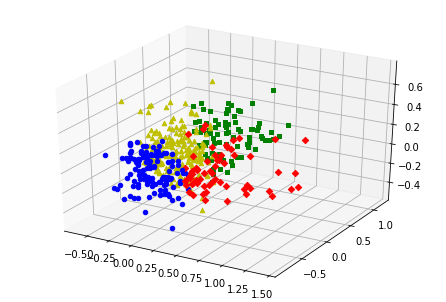

In [71]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(100,50))  
fig = plt.figure()
ax = Axes3D(fig)
colors = ['b', 'g', 'r','y']  
markers = ['o', 's', 'D','^']

for i,l in enumerate(kmeans.labels_): 
    ax.scatter(pca_y_new[i],pca_x_new[i],pca_z_new[i],color=colors[l],marker=markers[l],ls='None')

plt.show()  

#### The same logic from above, and we know component3 mainly represents new students from top 25%&10, and the room, it means we have more consideration about the accommodation. And here we got four clusters: Cluster brown means schools having low scores in all components, they connot get good fresh students from top 25% or 10% neither can they offer a lot of rooms to students. The other three has their feature. The cluster blue has high tuition fee while the green has low tuition fee and a little more room than cluster blue. As for the cluster red, it does a pretty good job in all three components, which means although it is expensive but it offers more room and has a lot of top students, sounds like thoes top priviate universities right?  eg: Columbia University.